# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Meet\Downloads\diabetes.csv')
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


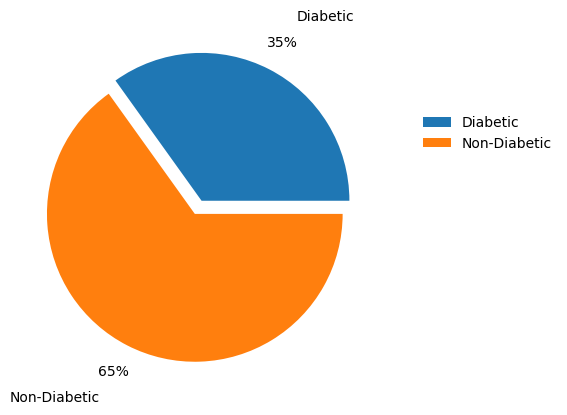

In [6]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [11]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(data.groupby('Outcome').mean()[var])

In [12]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(data[col_name][data.Outcome == 1], color ="red", rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

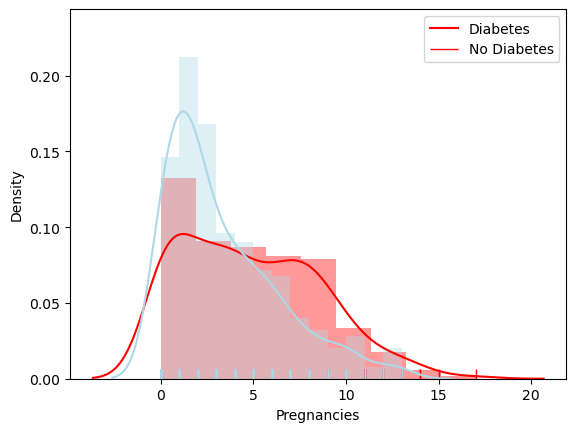

In [13]:
distplot('Pregnancies')

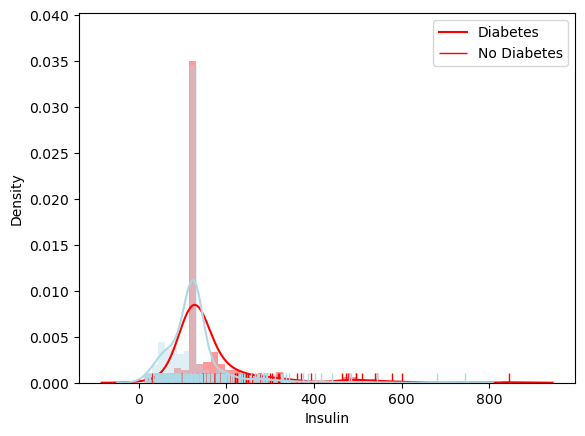

In [14]:
distplot('Insulin')

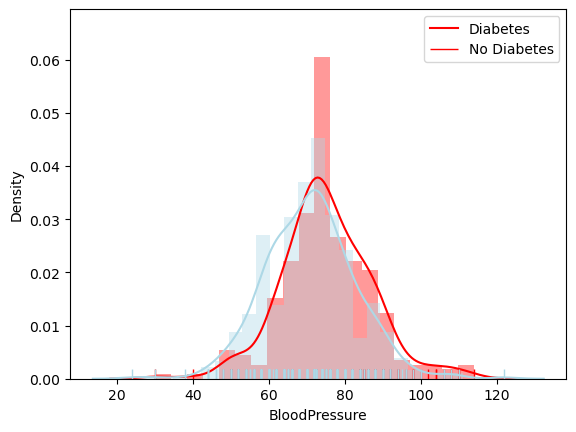

In [15]:
distplot('BloodPressure')

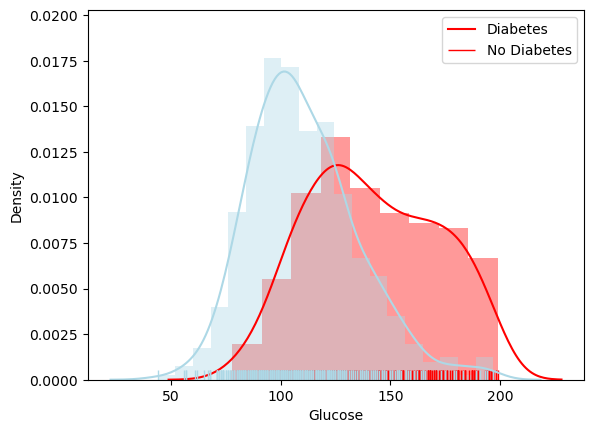

In [16]:
distplot('Glucose')

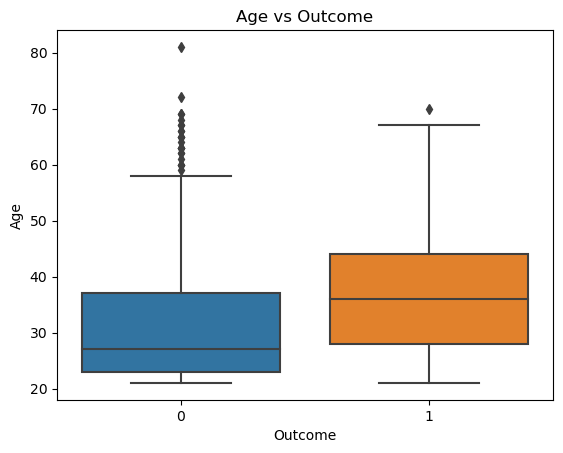

In [17]:
sns.boxplot(x = 'Outcome', y = 'Age', data = data)
plt.title('Age vs Outcome')
plt.show()

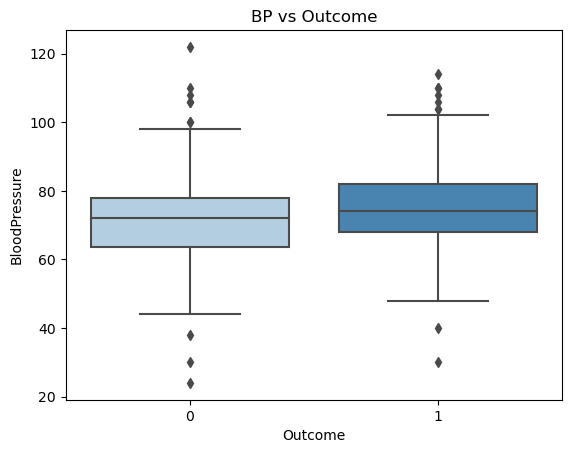

In [18]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = data, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

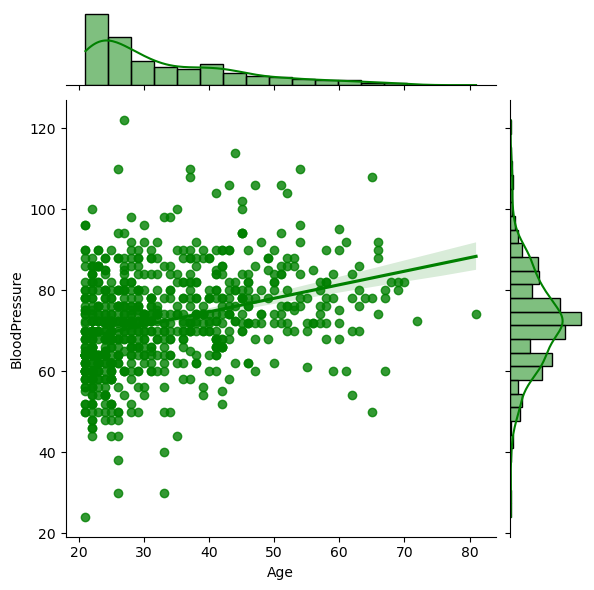

In [19]:
sns.jointplot(x='Age',y='BloodPressure', data=data, kind = 'reg', color = 'green')

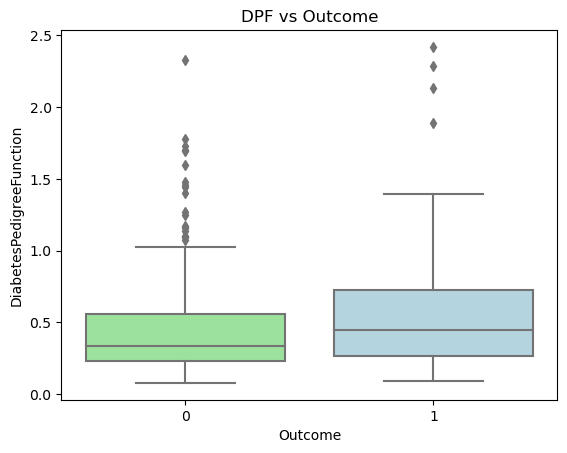

In [20]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = data, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

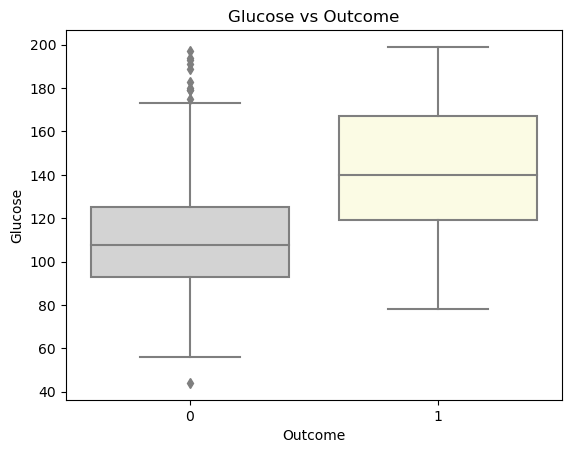

In [21]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = data, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

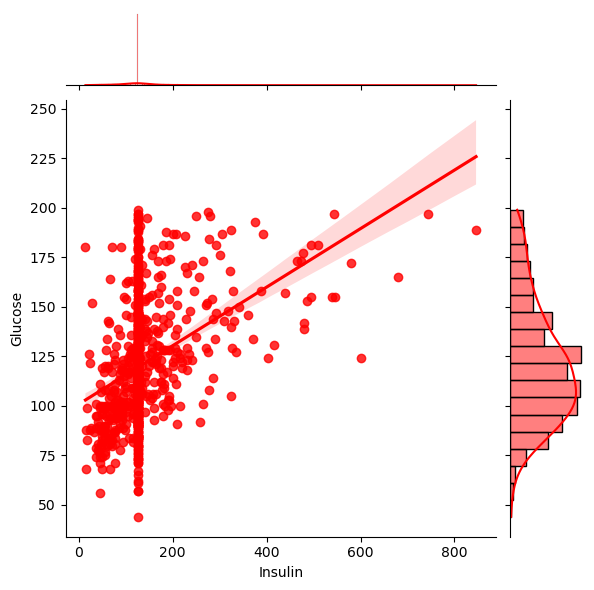

In [22]:
sns.jointplot(x='Insulin',y='Glucose', data=data, kind = 'reg', color = 'red')
plt.show()

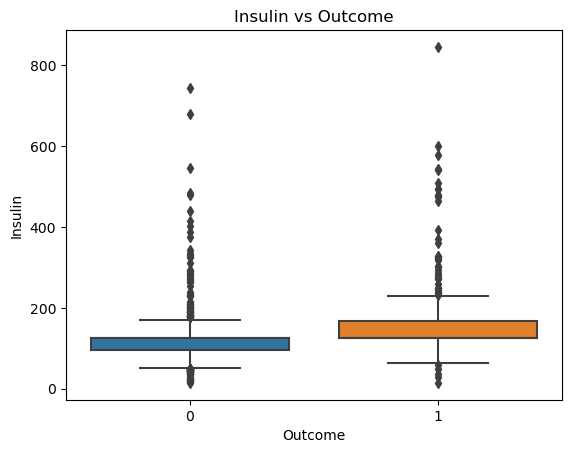

In [23]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = data)
plt.title('Insulin vs Outcome')
plt.show()

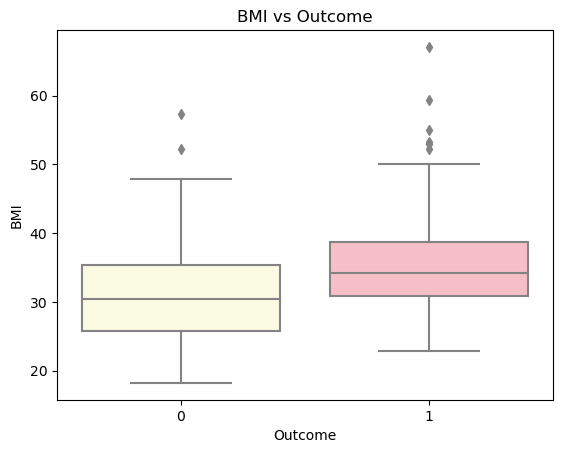

In [24]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = data, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

<AxesSubplot: >

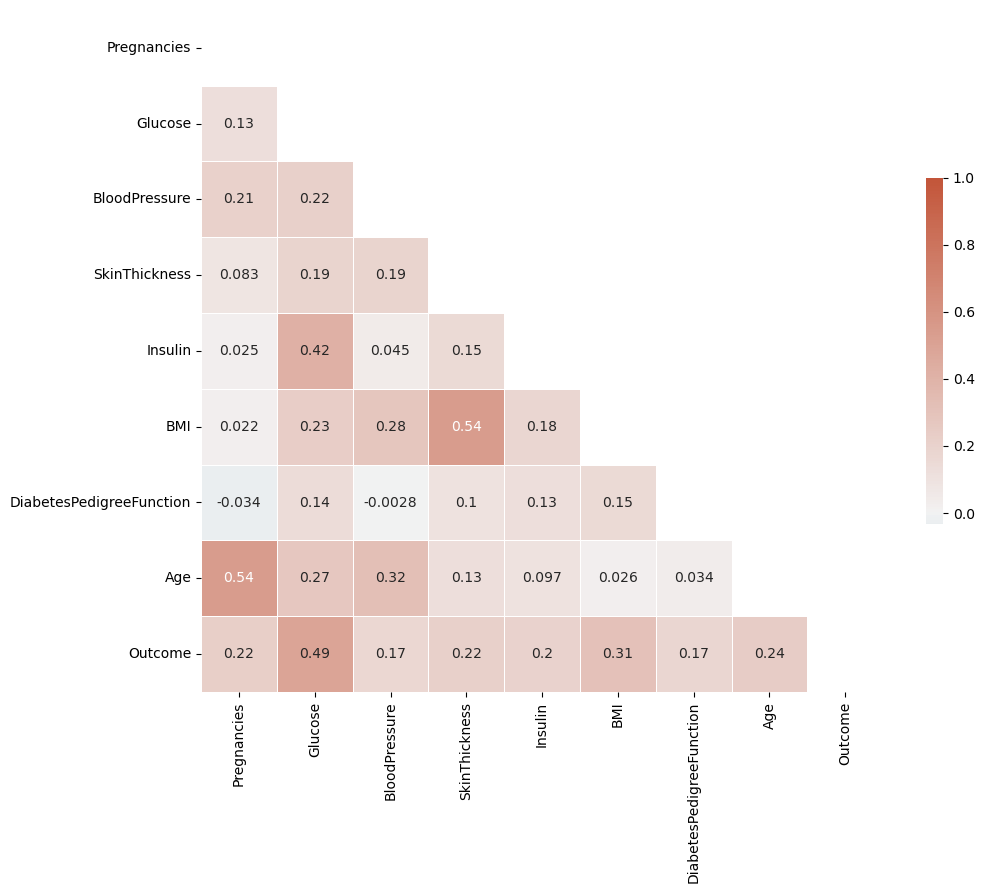

In [25]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Data splitting, scaling and modelling

In [26]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [28]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

In [30]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

### KNN

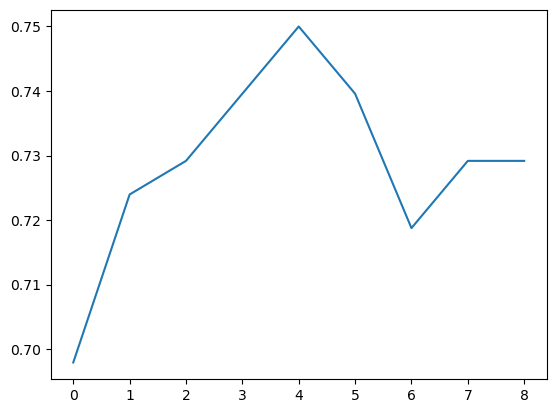

In [31]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [32]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.72
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841432    0.751351    0.8125    0.796392      0.809998
recall       0.877333    0.691542    0.8125    0.784438      0.812500
f1-score     0.859008    0.720207    0.8125    0.789608      0.810572
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[329  46]
 [ 62 139]]

Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774436   0.627119  0.729167    0.700777      0.723028
recall       0.824000   0.552239  0.729167    0.688119      0.729167
f1-score  

In [33]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
bayes=GaussianNB()
bayes.fit(X_train, y_train)

evaluation(bayes, X_train, y_train, X_test, y_test, True)
print()
evaluation(bayes, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 76.39%
_______________________________________________
F1 Score: 0.64
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799499    0.683616  0.763889    0.741557      0.759060
recall       0.850667    0.601990  0.763889    0.726328      0.763889
f1-score     0.824289    0.640212  0.763889    0.732251      0.760054
support    375.000000  201.000000  0.763889  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[319  56]
 [ 80 121]]


Test Result:
Accuracy Score: 73.44%
_______________________________________________
F1 Score: 0.62
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.793651   0.621212  0.734375    0.707431      0.733477
recall       0.800000   0.611940  0.734375    0.705970      0.734375
f1-score 

In [35]:
train_score_bayes = round(accuracy_score(y_train, bayes.predict(X_train)) * 100, 2)
test_score_bayes = round(accuracy_score(y_test, bayes.predict(X_test)) * 100, 2)

### SVM classifier

In [36]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)

evaluation(svm, X_train, y_train, X_test, y_test, True)
evaluation(svm, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 84.90%
_______________________________________________
F1 Score: 0.76
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.842857    0.865385  0.848958    0.854121      0.850718
recall       0.944000    0.671642  0.848958    0.807821      0.848958
f1-score     0.890566    0.756303  0.848958    0.823434      0.843714
support    375.000000  201.000000  0.848958  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[354  21]
 [ 66 135]]

Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.55
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.757143   0.634615  0.723958    0.695879      0.714386
recall       0.848000   0.492537  0.723958    0.670269      0.723958
f1-score  

In [37]:
train_score_svm = round(accuracy_score(y_train, svm.predict(X_train)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_test)) * 100, 2)

### Comparision

In [38]:
models = {
           'Train Accuracy': [train_score_lr, train_score_knn, train_score_bayes, train_score_svm],
          'Test Accuracy' : [test_score_lr, test_score_knn,  test_score_bayes, test_score_svm]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'K-Nearest Neighbor', 'Naive Bayes', 'Singular Value Decomposition'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.99,72.40
K-Nearest Neighbor,81.25,72.92
Naive Bayes,76.39,73.44
Singular Value Decomposition,84.90,72.40


### Logistic regression tuning

In [83]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
grid={"C":[0.001,0.01, 0.1,1,5,10,15], "penalty":["l1","l2"]}
logreg=LogisticRegression(solver="liblinear")
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.784767616191904


In [86]:
lg_model = LogisticRegression(C=0.1,penalty='l1',solver="liblinear")
lg_model.fit(X_train,y_train)
print("train score",lg_model.score(X_train,y_train))
print("test score",lg_model.score(X_test,y_test))
print("log-loss:",log_loss(y_test,lg_model.predict_proba(X_test)))

train score 0.7916666666666666
test score 0.7135416666666666
log-loss: 0.49901154607897497


### KNN tuning

In [87]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.776071964017991
Best Parameters: {'n_neighbors': 20}


In [89]:
print("train score",knn_cv.score(X_train,y_train))
print("test score",knn_cv.score(X_test,y_test))
print("log-loss:",log_loss(y_test,knn_cv.predict_proba(X_test)))

train score 0.796875
test score 0.765625
log-loss: 0.466649572489016


### Naive Bayes tuning

In [93]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=bayes, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test);
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.75


### SVM tuning

In [98]:
svm_cv=GridSearchCV(svm, {'C':[1,10,20,50],'kernel':['linear', 'rbf']},cv=15)
svm_cv.fit(X_train,y_train)
print(svm_cv.best_score_, svm_cv.best_params_)

0.7778677462887988 {'C': 1, 'kernel': 'linear'}
